In [46]:
import numpy as np
import re
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import pandas

#Extracting sentences from csv and merging them into one text

tb = pandas.read_csv("tweets-dataset.csv")
rawtext = " ".join(list(tb['Sentence']))
text = re.sub(r"http\S*"," ",rawtext)
text = re.sub(r"&amp"," ",text)
text = re.sub(r"[^a-zA-Z#]"," ",text)
text = re.sub(r"\s[#\w]\s"," ",text)

In [47]:
#Tokenizing the text
import nltk
toks=nltk.TweetTokenizer(strip_handles=True, reduce_len=True).tokenize(text)

In [48]:
#Question 1
#Finding values
ntok = len(toks)
ntyp = len(set(toks))
TTR = ntyp/ntok

#Printing values
print('Number of Tokens:',ntok)
print('Number of types:',ntyp)
print('TTR:',TTR)

Number of Tokens: 308118
Number of types: 44747
TTR: 0.14522682868251774


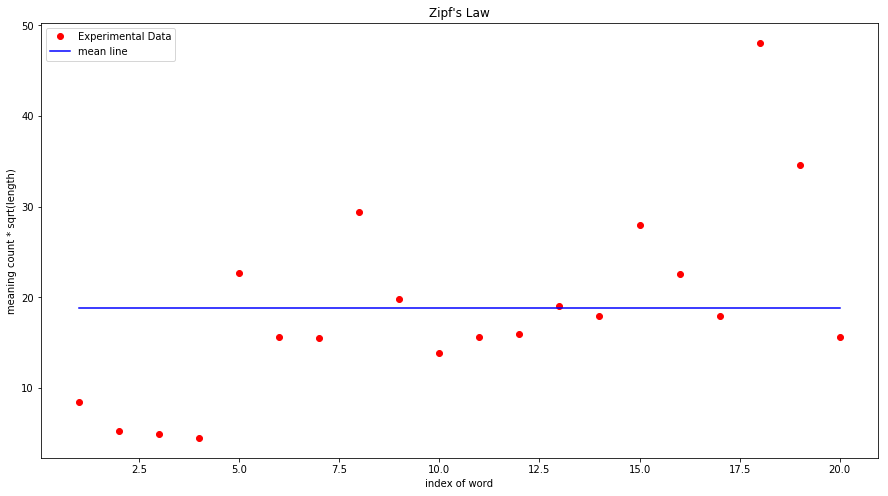

In [78]:
#Question 2
'''
(word) (meanings count)
tomorrow 3
twitter 2
gandhi 2
india 2
do 16
day 9
so 11
out 17
up 14
can 8
one 9
love 8
new 11
night 8
game 14
use 13
about 8
go 34
has 20
humor 7
'''

m = np.array([3,2,2,2,16,9,11,17,14,8,9,8,11,8,14,13,8,34,20,7])
l = np.array([8,7,6,5,2,3,2,3,2,3,3,4,3,5,4,3,5,2,3,5])
rn = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
y = np.multiply(m,np.sqrt(l))
plt.figure(figsize=(15,8))

#plot of actual data and line y = mean(m*sqrt(l) array)
plt.plot(rn, y, 'ro',label='Experimental Data')
plt.plot(rn, 20*[np.mean(y)],'-b',label = 'mean line')
plt.legend(loc='upper left')
plt.title('Zipf\'s Law')
plt.xlabel('index of word')
plt.ylabel('meaning count * sqrt(length)')
plt.show()

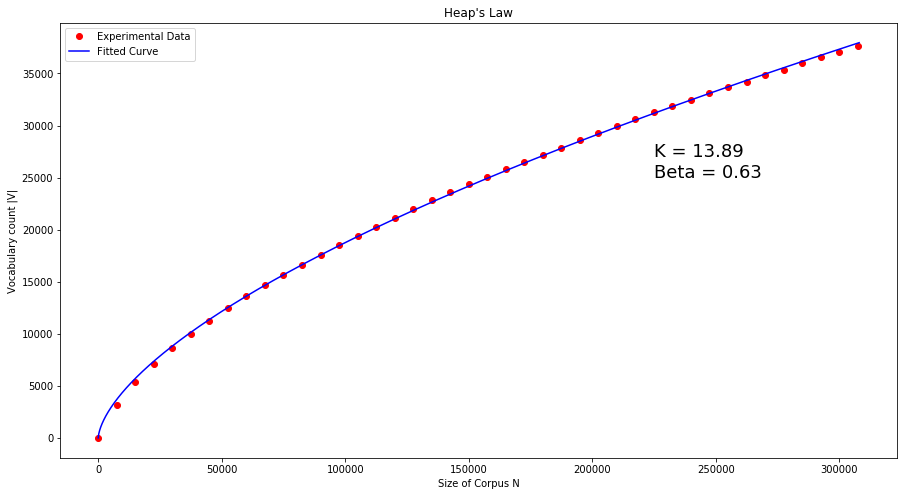

In [50]:
#Question 3
#Finding value of V for each N in given file
type_so_far = 0
V = []
N = []
vocab = set()
n=0
for token in toks:
    if token[0]!="#":
        token = token.lower()
    vocab.add(token)
    V.append(len(vocab))
    n+=1
    N.append(n)
    
#fitting Heap's law equation to actual data
nV = np.array(V)
nN = np.array(N)

def hlawfunc(x,k,beta):
    return k*(pow(x,beta))

pa = curve_fit(hlawfunc,nN,nV)
k,beta = pa[0]

#plot of actual data and fitted curve
plt.plot(N[::7500], V[::7500], 'ro',label='Experimental Data')
plt.plot(nN,hlawfunc(nN,k,beta),'-b',label = 'Fitted Curve')
plt.legend(loc='upper left')
plt.title('Heap\'s Law')
plt.xlabel('Size of Corpus N')
plt.ylabel('Vocabulary count |V|')
plt.text(225000, 25000, 'K = ' + str(round(k,2)) + '\nBeta = ' + str(round(beta,2)), dict(size=18))
plt.show()